# ALP - Data Mining
Nama : Fahrizal Dwi Rinaldi

NIM : 0706022110041

### Import Library

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import GaussianNB

### Load Dataset

In [4]:
dataset = 'C:/Users/Fahrizal Dwi Rinaldi/Downloads/Semester 5/Data Mining/ALP/data.csv'
df = pd.read_csv(dataset, sep=';')
df.sample(n=10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
3549,1,1,1,9500,1,1,127.0,1,2,19,...,0,7,7,6,13.483333,0,7.6,2.6,0.32,Graduate
4029,4,7,1,9500,1,3,130.0,1,3,19,...,0,7,7,0,0.000000,0,16.2,0.3,-0.92,Dropout
2647,1,44,1,9003,1,39,130.0,1,38,38,...,0,6,15,2,12.000000,0,16.2,0.3,-0.92,Dropout
3493,1,7,1,9119,1,3,130.0,1,37,37,...,0,5,5,0,0.000000,0,12.7,3.7,-1.70,Dropout
2006,2,39,1,8014,0,1,146.0,1,37,37,...,0,6,6,6,14.166667,0,10.8,1.4,1.74,Graduate
1510,1,17,1,9254,1,1,127.0,1,1,1,...,0,6,0,0,0.000000,0,12.4,0.5,1.79,Dropout
818,1,17,2,9500,1,1,132.0,1,19,37,...,0,8,10,7,13.164286,0,11.1,0.6,2.02,Enrolled
1085,1,17,2,9130,1,1,127.0,1,3,1,...,0,6,0,0,0.000000,0,15.5,2.8,-4.06,Dropout
4350,1,44,1,9085,1,39,140.0,1,3,1,...,1,6,17,5,11.857143,0,12.4,0.5,1.79,Graduate
2304,1,17,1,9147,1,1,133.1,1,1,19,...,0,5,5,0,0.000000,0,11.1,0.6,2.02,Dropout


### Data Preparation and Cleaning  

In [5]:
cekDUplikat = df.duplicated().sum()
cekDUplikat

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
df = df.drop(['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification (grade)', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date' ], axis=1)
df = df.rename(columns={"Nacionality": "Nationality"})
df['Target'] = LabelEncoder().fit_transform(df['Target'])

df.head()

,Marital status,Previous qualification,Nationality,Admission grade,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,127.3,1,0,20,0,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,1,1,142.5,1,0,19,0,0,6,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,1,124.8,1,0,19,0,0,6,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,1,1,119.6,0,0,20,0,0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,1,1,141.5,0,0,45,0,0,6,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


### EDA

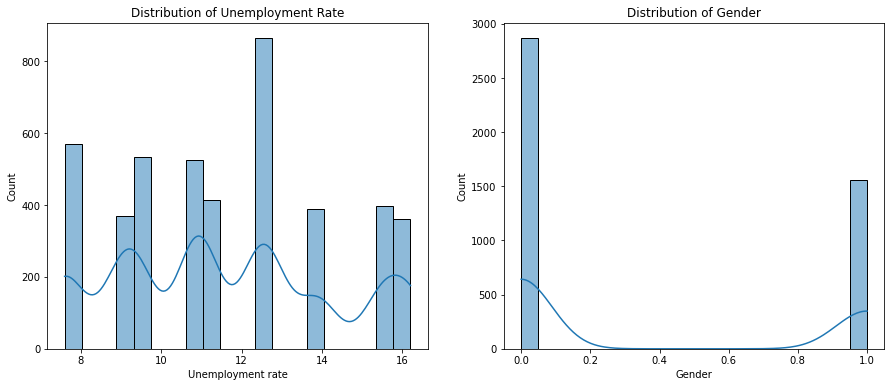

In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Unemployment rate'], bins=20, kde=True)
plt.title('Distribution of Unemployment Rate')

plt.subplot(1, 2, 2)
sns.histplot(df['Gender'], bins=20, kde=True)
plt.title('Distribution of Gender')

plt.show()

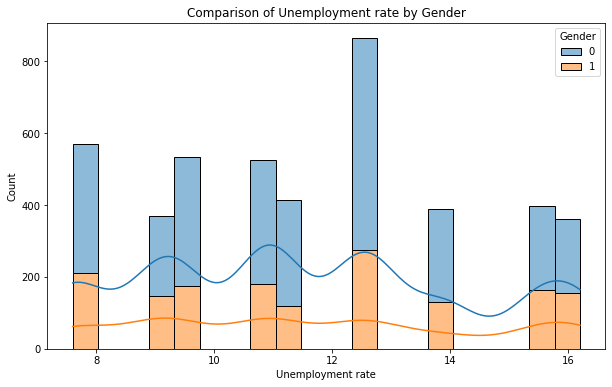

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Unemployment rate', hue='Gender', multiple="stack", bins=20, kde=True)
plt.title('Comparison of Unemployment rate by Gender')
plt.xlabel('Unemployment rate')
plt.ylabel('Count')
plt.show()

In [11]:
dfscaled = StandardScaler().fit_transform(df)


### K-Means Clustering

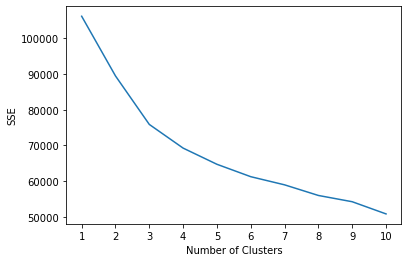

In [12]:
kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42,}

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(dfscaled)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [13]:
from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is ', findknee.elbow)

the best k for your model is  4


In [14]:
kmeans = KMeans(n_init=3 , n_clusters=4, max_iter=300, random_state=42)
ykmeans= kmeans.fit_predict(dfscaled)
df['K-Means']= ykmeans

### Hierarchical Clustering

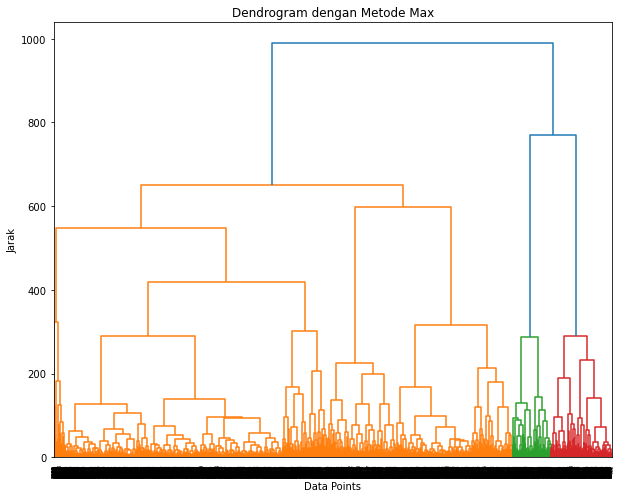

In [15]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data_for_dendrogram = df.drop('K-Means', axis=1) 

linkage_matrix = linkage(data_for_dendrogram, method='ward', metric='euclidean')

plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, orientation='top', p=30, truncate_mode='level', show_leaf_counts=True)
plt.title('Dendrogram dengan Metode Max')
plt.xlabel('Data Points')
plt.ylabel('Jarak')
plt.show()

### Prediction Model: Logistic Regression

In [16]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [19]:
Logreg = LogisticRegression(random_state=0)
Logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [20]:
ypred = Logreg.predict(X_test_scaled)
print(ypred)

[2 0 2 2 1 0 2 2 0 2 0 0 1 2 0 2 1 0 2 1 0 2 2 2 2 0 0 0 2 2 0 0 2 2 2 2 2
 2 0 0 2 0 2 2 2 1 1 2 2 2 0 0 1 0 2 0 2 2 0 2 2 1 2 1 0 2 0 2 2 0 0 2 0 0
 0 2 1 0 2 2 2 1 2 2 0 2 0 0 0 2 2 2 0 1 0 0 2 2 2 0 2 2 2 2 2 0 1 0 1 0 2
 1 0 2 2 0 2 2 0 2 0 2 0 0 2 0 2 0 0 2 2 2 0 2 2 2 0 2 0 0 2 1 0 0 2 2 2 0
 0 2 0 0 0 0 2 0 0 1 2 0 2 0 0 0 0 2 2 0 1 0 1 0 2 2 0 2 0 1 1 2 1 0 0 2 2
 2 1 0 0 2 1 1 2 2 1 2 1 2 0 2 1 0 2 2 0 2 2 2 0 0 2 2 0 2 1 1 2 2 1 2 2 2
 2 2 0 2 1 2 2 1 2 2 1 0 2 2 2 1 2 2 2 2 1 1 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 1 2 2 2 2 0 2 2 1 0 2 0 2 2 2 2 0 2 2 2 1 1 0 1 2 0 2
 0 0 2 0 0 2 0 2 2 0 2 0 0 2 0 0 2 2 2 2 2 0 2 2 0 0 0 2 2 1 0 2 2 0 0 2 0
 2 0 0 0 2 2 0 1 2 2 0 2 0 2 2 0 2 1 2 2 0 2 1 2 2 0 2 2 2 2 0 2 2 2 2 2 2
 2 0 0 0 1 2 2 2 2 1 2 2 1 2 0 2 0 0 2 2 2 0 2 2 2 0 0 0 2 2 1 2 2 0 2 2 2
 2 2 2 2 0 0 2 1 0 2 2 2 0 2 0 2 2 0 0 0 2 2 2 0 2 0 0 2 0 2 2 0 1 2 2 2]


In [21]:
ConMat = confusion_matrix(y_test,ypred)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypred)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[120  12  13]
 [ 20  31  26]
 [  9   9 203]]
Accuracy Score:  0.7990970654627539


### Prediction Model: KNN

In [22]:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
modelKNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [23]:
ypredKNN = modelKNN.predict(X_test_scaled)
print(ypredKNN)

[2 0 2 2 1 1 2 2 0 2 1 0 1 0 0 2 1 0 2 0 0 2 2 1 2 1 2 0 2 2 0 0 2 2 0 2 2
 2 1 0 2 0 2 2 2 0 0 2 2 2 0 0 1 0 2 0 2 2 0 1 2 0 1 1 0 2 1 2 2 0 0 2 1 0
 2 2 1 2 2 2 2 1 1 2 0 1 0 0 0 2 0 1 0 1 0 0 1 2 2 0 2 2 2 2 1 0 2 0 2 0 2
 2 0 0 1 0 2 2 0 2 0 2 0 0 2 0 2 0 0 2 0 2 0 2 2 2 0 2 2 0 2 1 1 1 2 2 2 0
 0 2 0 0 2 0 0 0 0 1 2 0 2 0 0 0 0 2 2 1 1 0 2 0 2 1 0 1 0 1 0 2 0 0 0 2 0
 2 1 0 2 2 0 2 2 2 0 2 1 2 0 0 0 2 2 2 0 2 2 2 1 2 2 2 0 2 1 1 2 2 0 2 2 0
 2 2 0 2 1 2 0 1 2 2 1 0 2 0 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 0 2 1 2 1 0 2 2 0 0 2 0 1 1 2 2 2 2 2 1 2 2 0 2 2 0 2
 1 0 2 0 0 2 0 2 1 0 2 0 0 2 0 0 1 2 2 2 1 1 2 2 0 0 0 0 2 2 1 2 2 0 0 2 0
 1 0 0 0 2 2 0 0 2 2 0 2 0 2 2 0 2 0 1 1 0 1 1 2 2 0 2 2 2 1 1 2 2 2 2 1 1
 2 0 1 0 1 1 2 2 2 0 2 2 0 2 0 1 0 0 2 0 2 1 2 2 2 0 0 0 2 1 2 2 2 0 2 2 2
 2 1 2 2 0 2 2 2 0 1 2 2 0 2 0 2 2 0 0 0 2 2 2 0 2 1 0 2 0 2 2 0 1 2 2 2]


In [24]:
ConMat = confusion_matrix(y_test,ypredKNN)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypredKNN)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[110  14  21]
 [ 25  31  21]
 [ 15  27 179]]
Accuracy Score:  0.7223476297968398


### Prediction Model: Naive Bayes

In [25]:
modelNB = GaussianNB()
modelNB.fit(X_train_scaled, y_train)

GaussianNB()

In [26]:
ypredNB = modelNB.predict(X_test_scaled)
print(ypredNB)

[2 0 2 2 1 0 0 2 2 2 2 0 2 2 1 2 1 0 2 1 0 2 2 2 2 1 0 0 2 2 1 2 2 2 1 2 2
 2 0 0 2 0 2 2 2 1 1 2 1 2 0 0 1 0 2 1 2 2 0 2 2 1 1 1 1 2 1 2 2 0 0 2 1 2
 1 2 1 0 2 2 2 1 2 2 0 2 0 1 0 2 0 2 1 1 1 0 2 2 2 0 2 2 2 2 2 0 1 0 2 0 2
 2 0 0 2 0 2 2 0 1 1 2 0 0 2 0 2 0 0 2 2 2 0 1 2 2 0 2 0 0 2 1 1 1 2 2 2 0
 0 2 0 0 2 0 2 0 0 1 2 2 2 0 2 1 0 1 2 2 1 0 1 1 1 2 0 2 0 2 1 2 2 0 0 2 2
 2 2 0 0 2 2 2 2 1 1 2 1 2 2 1 1 0 1 2 0 2 2 0 1 1 2 2 0 2 1 1 0 2 1 2 2 2
 2 2 0 2 2 2 1 1 2 2 1 0 2 2 2 1 2 2 0 2 1 1 2 2 2 1 1 2 2 0 2 2 1 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 1 2 2 2 2 0 2 0 0 1 2 0 2 2 2 2 2 1 0 2 2 1 0 1 2 0 2
 1 0 2 0 0 2 0 2 1 0 2 1 0 2 0 0 2 2 2 2 1 0 2 0 1 0 0 1 2 1 1 2 2 0 0 2 0
 2 0 0 0 1 2 0 1 0 2 0 2 0 2 2 0 1 1 2 2 0 2 1 2 2 0 2 2 2 1 1 2 2 2 1 2 2
 2 0 1 0 1 2 0 2 1 0 1 2 1 2 0 2 0 2 2 1 2 0 2 2 2 0 2 0 2 2 2 2 1 1 2 2 2
 2 2 1 2 0 1 2 2 2 2 2 2 1 2 0 2 2 0 0 0 2 1 0 0 2 2 0 2 0 2 2 0 1 2 2 2]


In [27]:
ConMat = confusion_matrix(y_test,ypredNB)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypredNB)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[ 93  28  24]
 [ 11  41  25]
 [ 16  25 180]]
Accuracy Score:  0.708803611738149


Dari ketiga model prediksi, Logistic Regression memiliki tingkat akurasi paling tinggi diantara KNN dan Naive Bayes.